  # MULTICLASS CREDIT SCORE CASE


  ## Data Description

 - ID: Unique ID of the record
 - Customer_ID: Unique ID of the customer
 - Month: Month of the year
 - Name: The name of the person
 - Age: The age of the person
 - SSN: Social Security Number of the person
 - Occupation: The occupation of the person
 - Annual_Income: The Annual Income of the person
 - Monthly_Inhand_Salary: Monthly in-hand salary of the person
 - Num_Bank_Accounts: The number of bank accounts of the person
 - Num_Credit_Card: Number of credit cards the person is having
 - Interest_Rate: The interest rate on the credit card of the person
 - Num_of_Loan: The number of loans taken by the person from the bank
 - Type_of_Loan: The types of loans taken by the person from the bank
 - Delay_from_due_date: The average number of days delayed by the person from the date of payment
 - Num_of_Delayed_Payment: Number of payments delayed by the person
 - Changed_Credit_Card: The percentage change in the credit card limit of the person
 - Num_Credit_Inquiries: The number of credit card inquiries by the person
 - Credit_Mix: Classification of Credit Mix of the customer
 - Outstanding_Debt: The outstanding balance of the person
 - Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
 - Credit_History_Age: The age of the credit history of the person
 - Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
 - Total_EMI_per_month: The total EMI per month of the person
 - Amount_invested_monthly: The monthly amount invested by the person
 - Payment_Behaviour: The payment behaviour of the person
 - Monthly_Balance: The monthly balance left in the account of the person
 - Credit_Score: The credit score of the person

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import colorama
from colorama import Fore, Back, Style

#sklearn package
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

##keras package
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.utils import to_categorical

##lime package
import lime
from lime import lime_tabular

import warnings
warnings.filterwarnings("ignore")
import pickle

**Reading the csv file**

In [2]:
df = pd.read_csv("train.csv")
df.head()

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

In [3]:
#drop this columns because they do not make any impact in credit score
df_new = df.drop(['ID', 'Customer_ID','Name','SSN',],axis = 1)
df_new.shape

(100000, 24)

In [4]:
df_new.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
df.shape

(100000, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
df.describe().T

count          mean           std           min  \
ID                        100000.0  8.063150e+04  4.330149e+04   5634.000000   
Customer_ID               100000.0  2.598267e+04  1.434054e+04   1006.000000   
Month                     100000.0  4.500000e+00  2.291299e+00      1.000000   
Age                       100000.0  3.331634e+01  1.076481e+01     14.000000   
SSN                       100000.0  5.004617e+08  2.908267e+08  81349.000000   
Annual_Income             100000.0  5.050512e+04  3.829942e+04   7005.930000   
Monthly_Inhand_Salary     100000.0  4.197271e+03  3.186432e+03    303.645417   
Num_Bank_Accounts         100000.0  5.368820e+00  2.593314e+00      0.000000   
Num_Credit_Card           100000.0  5.533570e+00  2.067098e+00      0.000000   
Interest_Rate             100000.0  1.453208e+01  8.741330e+00      1.000000   
Num_of_Loan               100000.0  3.532880e+00  2.446356e+00      0.000000   
Delay_from_due_date       100000.0  2.108141e+01  1.480456e+01      0.000000   
Num_of_Delayed_Payment    100000.0  1.331312e+01  6.237166e+00      0.000000   
Changed_Credit_Limit      100000.0  1.047032e+01  6.609481e+00      0.500000   
Num_Credit_Inquiries      100000.0  5.798250e+00  3.867826e+00      0.000000   
Outstanding_Debt          100000.0  1.426220e+03  1.155129e+03      0.230000   
Credit_Utilization_Ratio  100000.0  3.228517e+01  5.116875e+00     20.000000   
Credit_History_Age        100000.0  2.212205e+02  9.968072e+01      1.000000   
Total_EMI_per_month       100000.0  1.076992e+02  1.322671e+02      0.000000   
Amount_invested_monthly   100000.0  5.510131e+01  3.900693e+01      0.000000   
Monthly_Balance           100000.0  3.926976e+02  2.016527e+02      0.007760   

                                   25%           50%           75%  \
ID                        4.313275e+04  8.063150e+04  1.181302e+05   
Customer_ID               1.366450e+04  2.577700e+04  3.838500e+04   
Month                     2.750000e+00  4.500000e+00  6.250000e+00   
Age                       2.400000e+01  3.300000e+01  4.200000e+01   
SSN                       2.451686e+08  5.006886e+08  7.560027e+08   
Annual_Income             1.934297e+04  3.699971e+04  7.168347e+04   
Monthly_Inhand_Salary     1.626594e+03  3.095905e+03  5.957715e+03   
Num_Bank_Accounts         3.000000e+00  5.000000e+00  7.000000e+00   
Num_Credit_Card           4.000000e+00  5.000000e+00  7.000000e+00   
Interest_Rate             7.000000e+00  1.300000e+01  2.000000e+01   
Num_of_Loan               2.000000e+00  3.000000e+00  5.000000e+00   
Delay_from_due_date       1.000000e+01  1.800000e+01  2.800000e+01   
Num_of_Delayed_Payment    9.000000e+00  1.400000e+01  1.800000e+01   
Changed_Credit_Limit      5.380000e+00  9.400000e+00  1.485000e+01   
Num_Credit_Inquiries      3.000000e+00  5.000000e+00  8.000000e+00   
Outstanding_Debt          5.660725e+02  1.166155e+03  1.945963e+03   
Credit_Utilization_Ratio  2.805257e+01  3.230578e+01  3.649666e+01   
Credit_History_Age        1.440000e+02  2.190000e+02  3.020000e+02   
Total_EMI_per_month       2.926889e+01  6.646230e+01  1.473926e+02   
Amount_invested_monthly   2.795911e+01  4.515655e+01  7.129580e+01   
Monthly_Balance           2.676160e+02  3.338654e+02  4.632157e+02   

                                   max  
ID                        1.556290e+05  
Customer_ID               5.099900e+04  
Month                     8.000000e+00  
Age                       5.600000e+01  
SSN                       9.999934e+08  
Annual_Income             1.799873e+05  
Monthly_Inhand_Salary     1.520463e+04  
Num_Bank_Accounts         1.100000e+01  
Num_Credit_Card           1.100000e+01  
Interest_Rate             3.400000e+01  
Num_of_Loan               9.000000e+00  
Delay_from_due_date       6.200000e+01  
Num_of_Delayed_Payment    2.500000e+01  
Changed_Credit_Limit      2.998000e+01  
Num_Credit_Inquiries      1.700000e+01  
Outstanding_Debt          4.998070e+03  
Credit_Utilization_Ratio  5.00

**Data Preparation**

In [8]:
#check for variables with missing values
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [9]:
#check for any duplicated values

duplicated = df.duplicated()
df[duplicated]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 28 columns]

In [10]:
##the proportion of the classes we have in the dependent variable

df_new['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [11]:
def condition(x):
    if x == "Good":
        return 0
    elif x == "Standard":
        return 1
    else:
        return 2

df_new['Credit_Score'] = df['Credit_Score'].apply(condition)

In [12]:
df_new['Credit_Mix'] = df['Credit_Mix'].apply(condition)

In [13]:
df_new

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1  23.0  Scientist       19114.12            1824.843333   
1          2  23.0  Scientist       19114.12            1824.843333   
2          3  23.0  Scientist       19114.12            1824.843333   
3          4  23.0  Scientist       19114.12            1824.843333   
4          5  23.0  Scientist       19114.12            1824.843333   
...      ...   ...        ...            ...                    ...   
99995      4  25.0   Mechanic       39628.99            3359.415833   
99996      5  25.0   Mechanic       39628.99            3359.415833   
99997      6  25.0   Mechanic       39628.99            3359.415833   
99998      7  25.0   Mechanic       39628.99            3359.415833   
99999      8  25.0   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0            7.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

                                            Type_of_Loan  ...  Credit_Mix  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...           0   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...           0   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...           0   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...           0   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...           0   
...                                                  ...  ...         ...   
99995                        Auto Loan, and Student Loan  ...           0   
99996                        Auto Loan, and Student Loan  ...           0   
99997                        Auto Loan, and Student Loan  ...           0   
99998                        Auto Loan, and Student Loan  ...           0   
99999                        Auto Loan, and Student Loan  ...           0   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0                809.98                 26.822620               265.0   
1                809.98                 31.944960               266.0   
2                809.98                 28.609352               267.0   
3                809.98                 31.377862               268.0   
4                809.98                 24.797347               269.0   
...                 ...                       ...                 ...   
99995            502.38                 34.663572               378.0   
99996            502.38                 40.565631               379.0   
99997            502.38                 41.255522               380.0   
99998            502.38                 33.638208               381.0   
99999            502.38                 34.192463               382.0   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                         No            49.574949                21.465380   
1                         No            49.574949                21.465380   
2                         No            49.574949                21.465380   
3                         No            49.574949                21.465380   
4                         No            49.574949                21.465380   
...    

In [14]:
df_new['Credit_Score'].value_counts(normalize=True)

1    0.53174
2    0.28998
0    0.17828
Name: Credit_Score, dtype: float64

In [15]:
##assign x the independent variables and y the target variable.
X = df_new.drop('Credit_Score', 1)
y = df_new['Credit_Score']

In [16]:
X.shape, y.shape

((100000, 23), (100000,))

In [17]:
#allocate the categorical variables to X_cat 

cat_col = []
for col in X:
    if df_new[col].dtypes != "object":
        cat_col.append(col)
X_cat = X.drop(columns=cat_col)
X_cat.head()

Occupation                                       Type_of_Loan  \
0  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   

  Payment_of_Min_Amount                 Payment_Behaviour  
0                    No   High_spent_Small_value_payments  
1                    No    Low_spent_Large_value_payments  
2                    No   Low_spent_Medium_value_payments  
3                    No    Low_spent_Small_value_payments  
4                    No  High_spent_Medium_value_payments

In [18]:
X_cat.shape

(100000, 4)

In [19]:
#allocate the numerical variables to x_num

f = []
for col in X:
    if df_new[col].dtypes == "object":
        f.append(col)
X_num = X.drop(columns=f)
X_num.head()

Month   Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      1  23.0       19114.12            1824.843333                3.0   
1      2  23.0       19114.12            1824.843333                3.0   
2      3  23.0       19114.12            1824.843333                3.0   
3      4  23.0       19114.12            1824.843333                3.0   
4      5  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     4.0                 11.27                   4.0   
2                     7.0                 11.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     4.0                 11.27                   4.0   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0           0            809.98                 26.822620               265.0   
1           0            809.98                 31.944960               266.0   
2           0            809.98                 28.609352               267.0   
3           0            809.98                 31.377862               268.0   
4           0            809.98                 24.797347               269.0   

   Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
0            49.574949                 21.46538       312.494089  
1            49.574949                 21.46538       284.629162  
2            49.574949                 21.46538       331.209863  
3            49.574949                 21.46538       223.451310  
4            49.574949                 21.46538       341.489231

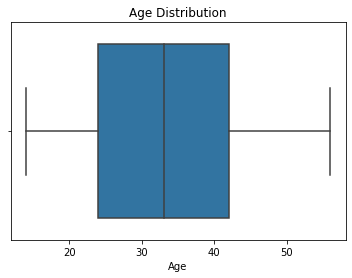

In [20]:
#plotting the distribution of ageinthe data
ax=sns.boxplot(x="Age",data=df_new)
for i in ax.containers:
    ax.bar_label(i)
    
#show figure
plt.title('Age Distribution')
plt.show()

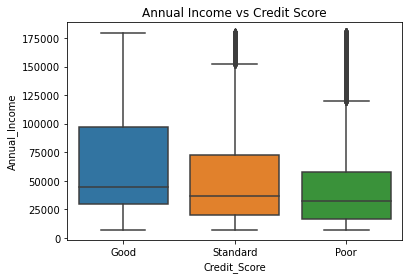

In [21]:
sns.boxplot(data=df, x='Credit_Score', y='Annual_Income')
plt.title('Annual Income vs Credit Score')
plt.show()

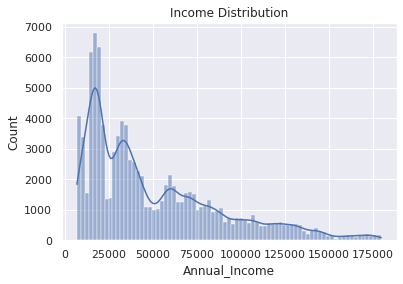

In [22]:
sns.set(style="darkgrid")

sns.histplot(data=df_new, x="Annual_Income", kde=True)
plt.title('Income Distribution')
plt.show()

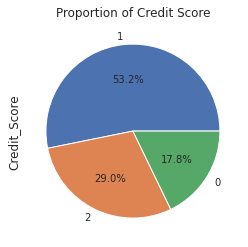

In [23]:
df_new['Credit_Score'].value_counts().plot.pie(autopct='%1.1f%%', textprops ={'fontsize':10})
plt.title('Proportion of Credit Score')
plt.show()

In [24]:
#use label encoder for categorical variables#

le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

In [25]:
X.head()

Month   Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1  23.0          12       19114.12            1824.843333   
1      2  23.0          12       19114.12            1824.843333   
2      3  23.0          12       19114.12            1824.843333   
3      4  23.0          12       19114.12            1824.843333   
4      5  23.0          12       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.0              4.0            3.0          4.0   
1                3.0              4.0            3.0          4.0   
2                3.0              4.0            3.0          4.0   
3                3.0              4.0            3.0          4.0   
4                3.0              4.0            3.0          4.0   

   Type_of_Loan  ...  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0           128  ...                   4.0           0            809.98   
1           128  ...                   4.0           0            809.98   
2           128  ...                   4.0           0            809.98   
3           128  ...                   4.0           0            809.98   
4           128  ...                   4.0           0            809.98   

   Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620               265.0                      1   
1                 31.944960               266.0                      1   
2                 28.609352               267.0                      1   
3                 31.377862               268.0                      1   
4                 24.797347               269.0                      1   

   Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0            49.574949                 21.46538                  2   
1            49.574949                 21.46538                  3   
2            49.574949                 21.46538                  4   
3            49.574949                 21.46538                  5   
4            49.574949                 21.46538                  1   

   Monthly_Balance  
0       312.494089  
1       284.629162  
2       331.209863  
3       223.451310  
4       341.489231  

[5 rows x 23 columns]

**Analysis of Loan status on other predictors**

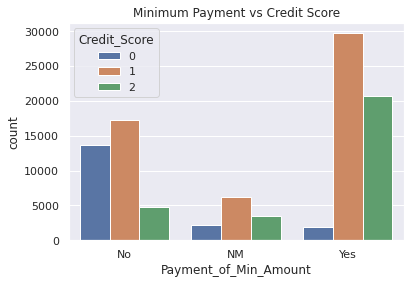

In [26]:
sns.countplot(x ='Payment_of_Min_Amount', hue='Credit_Score',data=df_new)
plt.title('Minimum Payment vs Credit Score')
plt.show()

**Feature Selection**

In [27]:
from boruta import BorutaPy
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

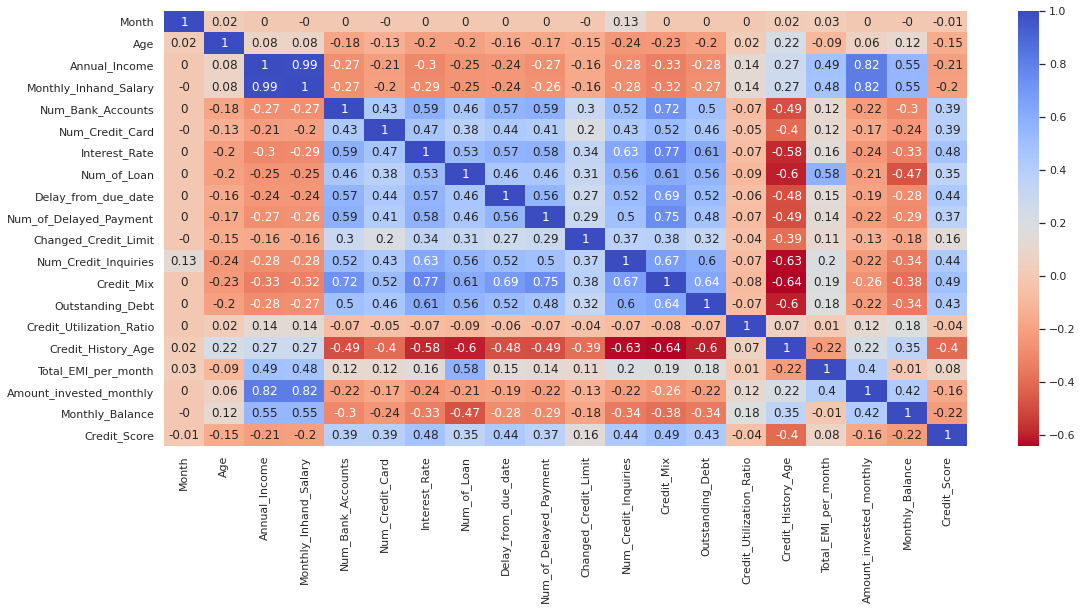

In [28]:
#use correlation to check collinearity
cor = df_new.corr(method='spearman')
cor = cor.round(2)
plt.figure(figsize=(18,8))
sns.heatmap(cor, cmap=plt.cm.coolwarm_r,annot=True)
plt.show() 

In [29]:
X = X.drop(['Amount_invested_monthly','Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',], axis=1)

In [30]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
estimator = DecisionTreeClassifier()
  
# Use RFE with cross-validation to 
# find the optimal number of features
selector = RFECV(estimator, cv=5)
selector = selector.fit(X, y)
  
# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)
  
# Print the selected features
print("Selected features: %s" % selector.support_)

Optimal number of features: 17
Selected features: [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True False  True False  True]


In [32]:
select_rfecv = X.columns[selector.support_].tolist()
select_rfecv

['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Monthly_Balance']

In [33]:

 # Select only the relevant features after dropping by extra trees classifer
X_new = X.drop(['Occupation','Type_of_Loan','Payment_of_Min_Amount','Total_EMI_per_month','Payment_Behaviour'], axis=1)
X_new.head()

Month   Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0      1  23.0       19114.12                3.0              4.0   
1      2  23.0       19114.12                3.0              4.0   
2      3  23.0       19114.12                3.0              4.0   
3      4  23.0       19114.12                3.0              4.0   
4      5  23.0       19114.12                3.0              4.0   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Changed_Credit_Limit  \
0            3.0          4.0                  3.0                 11.27   
1            3.0          4.0                  3.0                 11.27   
2            3.0          4.0                  3.0                 11.27   
3            3.0          4.0                  5.0                  6.27   
4            3.0          4.0                  6.0                 11.27   

   Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                   4.0           0            809.98   
1                   4.0           0            809.98   
2                   4.0           0            809.98   
3                   4.0           0            809.98   
4                   4.0           0            809.98   

   Credit_Utilization_Ratio  Credit_History_Age  Monthly_Balance  
0                 26.822620               265.0       312.494089  
1                 31.944960               266.0       284.629162  
2                 28.609352               267.0       331.209863  
3                 31.377862               268.0       223.451310  
4                 24.797347               269.0       341.489231

In [34]:
y = y[X.index]

In [35]:
X_new.shape

(100000, 15)

In [36]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
#X_scaled = scaler.fit_transform(X_new[['person_income', 'person_emp_length','loan_amnt', 'loan_int_rate','cb_person_cred_hist_length']])
X_scaled = scaler.fit_transform(X_new)

**Data Splitting**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(80000, 80000, 20000, 20000)

**Balancing the training set**

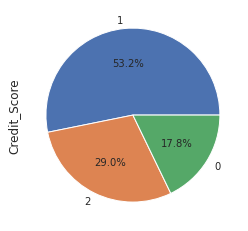

In [38]:
y.value_counts().plot.pie(autopct='%1.1f%%', textprops ={'fontsize':10})
plt.show()

In [39]:
y_train.value_counts(normalize=True)

1    0.532362
2    0.289650
0    0.177987
Name: Credit_Score, dtype: float64

In [40]:
counter = Counter(y_train)
print('Before', counter)

smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
counter = Counter(y_train_smt)
print('After', counter)

Before Counter({1: 42589, 2: 23172, 0: 14239})
After Counter({2: 42589, 0: 42589, 1: 42589})


**Building Model**

In [41]:
#np.random(2)
#model before balancing
model = LogisticRegression(random_state=0, multi_class='multinomial', penalty='l2', C=1.0, solver='lbfgs')
model.fit(x_train, y_train)

#model after balancing
logreg_smt = LogisticRegression(random_state=0, multi_class='multinomial',  penalty='l2', C=1.0, solver='lbfgs')
logreg_smt.fit(X_train_smt, y_train_smt)

#prediction
pred_y = model.predict(x_test)
y_pred_smt = logreg_smt.predict(x_test) 


In [42]:
#prediction
pred_y = model.predict(x_test)
y_pred_smt = logreg_smt.predict(x_test)

In [43]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_smt.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65
Accuracy of logistic regression classifier on test set: 0.65


In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
roc1 = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
roc2 = roc_auc_score(y_test, logreg_smt.predict_proba(x_test), multi_class='ovr')
roc1, roc2

(0.8089988021761676, 0.8049488784640487)

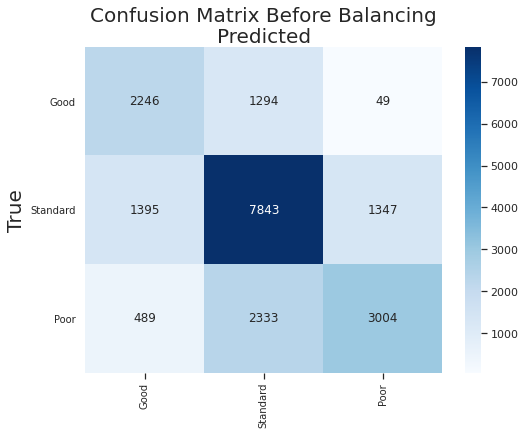

In [46]:
y_pred = np.argmax(pred_y, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_test, pred_y)

## Get Class Labels
labels =['Good','Standard','Poor'] #le.classes_
class_names = labels

# Plot confusion matrix 
fig = plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap='Blues'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix Before Balancing', fontsize=20)

plt.savefig('ConMat_l1.png')
plt.show()

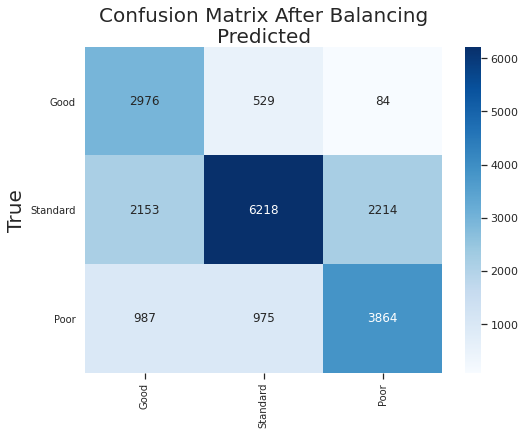

In [47]:
cm = confusion_matrix(y_test, y_pred_smt)
## Get Class Labels
labels =['Good','Standard','Poor'] #le.classes_
class_names = labels

# Plot confusion matrix 
fig = plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap='Blues'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix After Balancing', fontsize=20)

plt.savefig('ConMat_l2.png')
plt.show()

In [48]:
report = classification_report(y_test, pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.63      0.58      3589
           1       0.68      0.74      0.71     10585
           2       0.68      0.52      0.59      5826

    accuracy                           0.65     20000
   macro avg       0.64      0.63      0.63     20000
weighted avg       0.66      0.65      0.65     20000



In [49]:
report = classification_report(y_test, y_pred_smt)
print(report)

              precision    recall  f1-score   support

           0       0.49      0.83      0.61      3589
           1       0.81      0.59      0.68     10585
           2       0.63      0.66      0.64      5826

    accuracy                           0.65     20000
   macro avg       0.64      0.69      0.65     20000
weighted avg       0.70      0.65      0.66     20000



In [50]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
# Calculating the metrics of the model
print(f"Accuracy of the unbalanced data is: {accuracy_score(y_test, pred_y)}")
print(f"Accuracy of the balanced data is: {accuracy_score(y_test, y_pred_smt)}")

print(f"Balanced Accuracy of the unbalanced data is: {balanced_accuracy_score(y_test, pred_y)}")
print(f"Balanced Accuracy of the balanced data is: {balanced_accuracy_score(y_test, y_pred_smt)}")

print(f"Matthews Coefficient of the unbalanced data is: {matthews_corrcoef(y_test, pred_y)}")
print(f"Matthews Coefficient of the balanced data is: {matthews_corrcoef(y_test, y_pred_smt)}")

Accuracy of the unbalanced data is: 0.65465
Accuracy of the balanced data is: 0.6529
Balanced Accuracy of the unbalanced data is: 0.6274582917829153
Balanced Accuracy of the balanced data is: 0.6932897211873709
Matthews Coefficient of the unbalanced data is: 0.42274203129634275
Matthews Coefficient of the balanced data is: 0.48093538042576184


In [51]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
balanced_acc = balanced_accuracy_score(y_test, pred_y)
balanced_acc

0.6274582917829153

In [52]:
# predict probabilities
pred_prob1 = model.predict_proba(x_test)
pred_prob2 = logreg_smt.predict_proba(x_test)

In [53]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [54]:
roc1 = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
roc1

0.8089988021761676

In [55]:
roc2 = roc_auc_score(y_test, logreg_smt.predict_proba(x_test), multi_class='ovr')
roc2

0.8049488784640487

In [56]:
# Save the trained model as a pickle string.
#saved_model_ml1 = pickle.dumps(model)
#saved_model_ml2 = pickle.dumps(logreg_smt)

# Load the pickled model
#load_model1 = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
#load_model1.predict(X_test)

**Sequential Neural Networks**

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.utils import to_categorical

In [58]:
x_train.shape

(80000, 15)

In [59]:
y_train1 = to_categorical(y_train,num_classes=3)
y_train_smt1 = to_categorical(y_train_smt,num_classes=3)
y_test1 = to_categorical(y_test,num_classes=3)

In [60]:
y_train.shape, y_train1.shape

((80000,), (80000, 3))

In [61]:
# Define the model architecture
model_1 = Sequential()
model_1.add(Dense(units=10, activation='relu', input_dim=x_train.shape[1]))
model_1.add(layers.Dropout(0.1))
model_1.add(Dense(units=6, activation='relu' ))
model_1.add(layers.Dropout(0.1))
model_1.add(Dense(units=3, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                160       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model_1.fit(x_train, y_train1,validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.8090 - accuracy: 0.6081 - val_loss: 0.7174 - val_accuracy: 0.6650
Epoch 2/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7440 - accuracy: 0.6469 - val_loss: 0.6984 - val_accuracy: 0.6779
Epoch 3/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7268 - accuracy: 0.6558 - val_loss: 0.6862 - val_accuracy: 0.6853
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7192 - accuracy: 0.6622 - val_loss: 0.6808 - val_accuracy: 0.6890
Epoch 5/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7110 - accuracy: 0.6687 - val_loss: 0.6744 - val_accuracy: 0.6908
Epoch 6/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7060 - accuracy: 0.6696 - val_loss: 0.6707 - val_accuracy: 0.6957
Epoch 7/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7020 - accuracy: 0.6776 - val_loss: 0.6667 - val_accuracy:

In [63]:
# Define the model architecture
model_2 = Sequential()
model_2.add(Dense(units=10, activation='relu', input_dim=x_train.shape[1]))
model_2.add(layers.Dropout(0.1))
model_2.add(Dense(units=6, activation='relu' ))
model_2.add(layers.Dropout(0.1))
model_2.add(Dense(units=3, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


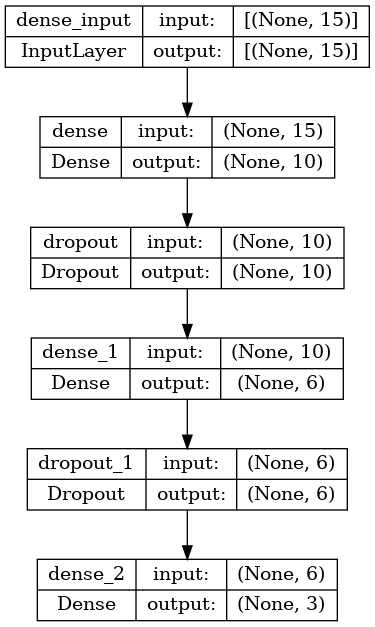

In [64]:
from tensorflow.keras.utils import plot_model

plot_model(model_1,show_shapes= True)

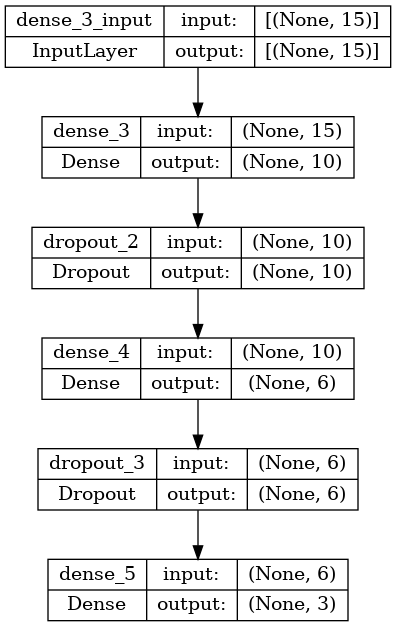

In [65]:
plot_model(model_2,show_shapes= True)

In [66]:
history1 = model_2.fit(X_train_smt, y_train_smt1,validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
3195/3195 [==============================] - 6s 2ms/step - loss: 0.8149 - accuracy: 0.6339 - val_loss: 0.8743 - val_accuracy: 0.7271
Epoch 2/50
3195/3195 [==============================] - 5s 2ms/step - loss: 0.7348 - accuracy: 0.6867 - val_loss: 0.8435 - val_accuracy: 0.6951
Epoch 3/50
3195/3195 [==============================] - 5s 2ms/step - loss: 0.7177 - accuracy: 0.6971 - val_loss: 0.8328 - val_accuracy: 0.7078
Epoch 4/50
3195/3195 [==============================] - 5s 2ms/step - loss: 0.7111 - accuracy: 0.7002 - val_loss: 0.8237 - val_accuracy: 0.7003
Epoch 5/50
3195/3195 [==============================] - 6s 2ms/step - loss: 0.7078 - accuracy: 0.7019 - val_loss: 0.8132 - val_accuracy: 0.7552
Epoch 6/50
3195/3195 [==============================] - 6s 2ms/step - loss: 0.7059 - accuracy: 0.6992 - val_loss: 0.8032 - val_accuracy: 0.7522
Epoch 7/50
3195/3195 [==============================] - 6s 2ms/step - loss: 0.7047 - accuracy: 0.6990 - val_loss: 0.8245 - val_accuracy:

In [67]:
# Make prediction on test dataset
pred_y1 = model_1.predict(x_test)
pred_y2 = model_2.predict(x_test)

625/625 [==============================] - 1s 919us/step


In [68]:
# Evaluate model
loss, accuracy = model_1.evaluate(x_test, y_test1)
 
print('Test loss:', loss)
print('Test accuracy:', accuracy)

625/625 [==============================] - 1s 1ms/step - loss: 0.6655 - accuracy: 0.6912
Test loss: 0.6655187010765076
Test accuracy: 0.6912000179290771


In [69]:
# Evaluate model
loss, accuracy = model_2.evaluate(x_test, y_test1)
 
print('Test loss:', loss)
print('Test accuracy:', accuracy)

625/625 [==============================] - 1s 1ms/step - loss: 0.7110 - accuracy: 0.6747
Test loss: 0.711022138595581
Test accuracy: 0.6746500134468079


In [70]:
pred_y1= np.argmax(pred_y1, axis=1)

In [71]:
y_true = np.argmax(y_test1, axis=1)
#y_true

In [72]:
pred_y2= np.argmax(pred_y2, axis=1)

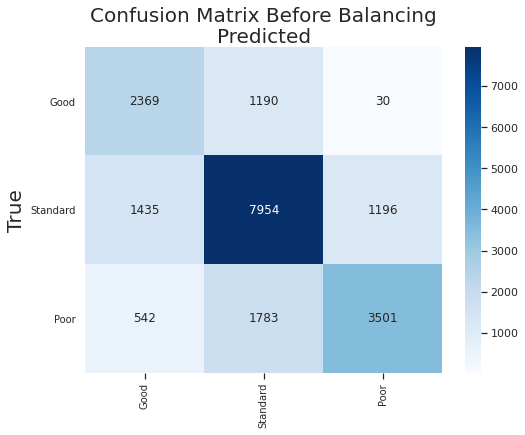

In [73]:
#y_pred = np.argmax(pred_y, axis=-1)

#y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, pred_y1)

## Get Class Labels
labels =['Good','Standard','Poor'] #le.classes_
class_names = labels

# Plot confusion matrix 
fig = plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap='Blues'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix Before Balancing', fontsize=20)

plt.savefig('confusion_m1.png')
plt.show()

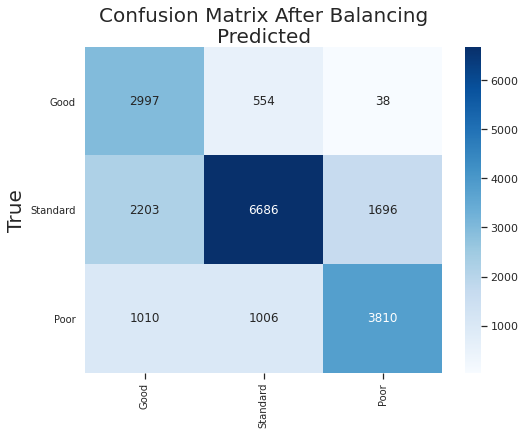

In [74]:
cm = confusion_matrix(y_true, pred_y2)

## Get Class Labels
labels =['Good','Standard','Poor'] #le.classes_
class_names = labels

# Plot confusion matrix 
fig = plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap='Blues'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix After Balancing', fontsize=20)

plt.savefig('confusionmat_m2.png')
plt.show()

In [75]:
report = classification_report(y_true, pred_y1)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.66      0.60      3589
           1       0.73      0.75      0.74     10585
           2       0.74      0.60      0.66      5826

    accuracy                           0.69     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.70      0.69      0.69     20000



In [76]:
report = classification_report(y_true, pred_y2)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.84      0.61      3589
           1       0.81      0.63      0.71     10585
           2       0.69      0.65      0.67      5826

    accuracy                           0.67     20000
   macro avg       0.66      0.71      0.66     20000
weighted avg       0.72      0.67      0.68     20000



In [77]:
print(f"Accuracy of the unbalanced data is: {accuracy_score(y_true, pred_y1)}")
print(f"Accuracy of the balanced data is: {accuracy_score(y_true, pred_y2)}")

print(f"Balanced Accuracy of the unbalanced data is: {balanced_accuracy_score(y_true, pred_y1)}")
print(f"Balanced Accuracy of the balanced data is: {balanced_accuracy_score(y_true, pred_y2)}")

print(f"Matthews Coefficient of the unbalanced data is: {matthews_corrcoef(y_true, pred_y1)}")
print(f"Matthews Coefficient of the balanced data is: {matthews_corrcoef(y_true, pred_y2)}")

Accuracy of the unbalanced data is: 0.6912
Accuracy of the balanced data is: 0.67465
Balanced Accuracy of the unbalanced data is: 0.6708133470268094
Balanced Accuracy of the balanced data is: 0.7068883634085878
Matthews Coefficient of the unbalanced data is: 0.4898250498968539
Matthews Coefficient of the balanced data is: 0.5085225354648982


In [78]:
roc1 = roc_auc_score(y_test1, model_1.predict(x_test), multi_class='ovr')
roc1

625/625 [==============================] - 1s 940us/step


0.8530790681071606

In [79]:
roc2 = roc_auc_score(y_test1, model_2.predict(x_test), multi_class='ovr')
roc2

625/625 [==============================] - 1s 929us/step


0.8454535453909552

In [80]:
# Save the trained model as a pickle string.
#saved_model_mn1 = pickle.dumps(model_1)
#saved_model_mn2 = pickle.dumps(model_2)

# Load the pickled model
#load_model1 = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
#load_model1.predict(X_test)

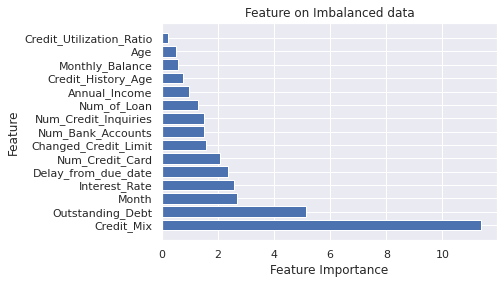

In [81]:
feature_names = X_new.columns
# Obtain the feature importances
importances = np.sum(np.abs(model_1.get_weights()[0]), axis=1)

# Sort the feature importances in descending order and get the corresponding feature names
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a horizontal bar plot of the feature importances
fig, ax = plt.subplots()
ax.barh(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
plt.title('Feature on Imbalanced data')
plt.savefig('feature imp m_n1.png')
plt.show()

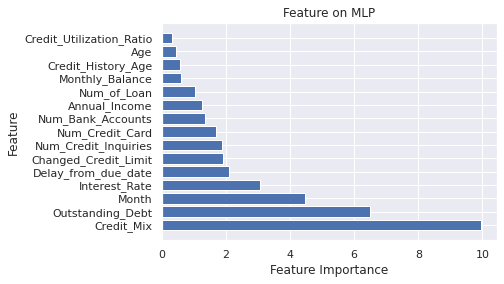

In [82]:
feature_names = X_new.columns
# Obtain the feature importances
importances = np.sum(np.abs(model_2.get_weights()[0]), axis=1)

# Sort the feature importances in descending order and get the corresponding feature names
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a horizontal bar plot of the feature importances
fig, ax = plt.subplots()
ax.barh(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
plt.title('Feature on MLP')
plt.savefig('feature imp m_n2.png')
plt.show()

# **LIME EXPLAINABILITY**

In [83]:
import lime
from lime import lime_tabular

In [84]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_new, y, test_size = 0.2, random_state=0)


In [85]:

smt = SMOTE()
X_train_smt1, y_train_smt1 = smt.fit_resample(x_train1, y_train1)
counter = Counter(y_train_smt)
print('After', counter)

After Counter({2: 42589, 0: 42589, 1: 42589})


In [86]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train1),
    feature_names=x_train1.columns,
     class_names=['Good','Standard','Poor'],
    mode='classification'
)

In [87]:
explainer1 = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_smt1),
    feature_names=X_train_smt1.columns,
     class_names=['Good','Standard','Poor'],
    mode='classification'
)

In [88]:
exp = explainer.explain_instance(
    data_row=x_test1.iloc[4], 
    predict_fn=model_1.predict
)

exp.show_in_notebook(show_table=True)

157/157 [==============================] - 0s 971us/step


In [89]:

exp = explainer1.explain_instance(
    data_row=x_test1.iloc[4], 
    predict_fn=model_2.predict
)

exp.show_in_notebook(show_table=True)

157/157 [==============================] - 0s 1ms/step
